In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
file_name = "Hackathon_Nobian_dataset.xlsx"
df = pd.read_excel(file_name)

In [3]:
df.head()

,valve (A) timestamp,valve (A) output value,flow setpoint (B) timestamp,flow setpoint (B) value,flow measurment (C) timestamp,flow measurment (C) value
0,2017-06-07 00:12:00,33.901329,2020-12-08 11:02:00,34.110046,2017-06-07 00:32:00,32.778099
1,2017-06-07 00:15:00,34.122898,2020-12-08 11:03:00,34.098965,2017-06-07 00:33:00,32.574242
2,2017-06-07 00:17:01,33.354141,2020-12-08 11:04:00,34.082336,2017-06-07 00:34:00,33.218788
3,2017-06-07 00:32:00,34.0994,2020-12-08 11:05:00,34.101734,2017-06-07 00:57:00,33.102821
4,2017-06-07 00:34:00,34.3881,2020-12-08 11:06:00,34.098965,2017-06-07 01:14:00,33.162628


In [4]:
df_A = df[["valve (A) timestamp", "valve (A) output value"]]
df_A = df_A.rename(columns={"valve (A) timestamp": "time", "valve (A) output value": "A"}).dropna()
df_B = df[["flow setpoint (B) timestamp", "flow setpoint (B) value"]]
df_B = df_B.rename(columns={"flow setpoint (B) timestamp": "time", "flow setpoint (B) value": "B"}).dropna()
df_C = df[["flow measurment (C) timestamp", "flow measurment (C) value"]]
df_C = df_C.rename(columns={"flow measurment (C) timestamp": "time", "flow measurment (C) value": "C"}).dropna()

In [5]:
df_A.tail()

,time,A
805436,2022-03-22 23:56:00,27.853661
805437,2022-03-22 23:57:00,27.953619
805438,2022-03-22 23:58:00,27.96612
805439,2022-03-22 23:59:00,27.888
805440,2022-03-23 00:00:00,27.834551


In [6]:
data = pd.merge_asof(df_A.sort_values("time"), df_B.sort_values("time"), on="time", tolerance=pd.Timedelta("10s"))
data = pd.merge_asof(data, df_C.sort_values("time"), on="time", tolerance=pd.Timedelta("10s"))

In [7]:
def drop_string(data, string_to_drop):
    data = data[data.A != string_to_drop]
    data = data[data.B != string_to_drop]
    data = data[data.C != string_to_drop]
    return data

In [8]:
data = drop_string(data, "Bad")
data = drop_string(data, "Unknown")

In [9]:
data = data.dropna()
data = data.astype({'A': 'float', 'B': 'float', 'C': 'float'})
data.head()

,time,A,B,C
161157,2020-12-08 11:02:00,41.358326,34.110046,34.251369
161158,2020-12-08 11:03:00,41.336464,34.098965,34.270210
161159,2020-12-08 11:04:00,41.150490,34.082336,35.234749
161160,2020-12-08 11:05:00,41.724281,34.101734,33.305672
161161,2020-12-08 11:06:00,41.843632,34.098965,33.697521


In [10]:
data.A.min()

-6.0

In [ ]:
import pickle

pickle.dump(data, open("cleaned_data.pkl", "wb"))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


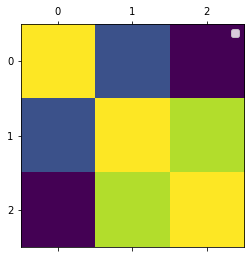

In [11]:
plt.matshow(data.corr())
plt.legend()
plt.show()

In [12]:
%matplotlib qt
data.plot(x="time", figsize=(20, 20))

ImportError: Failed to import any qt binding

<AxesSubplot:xlabel='time'>

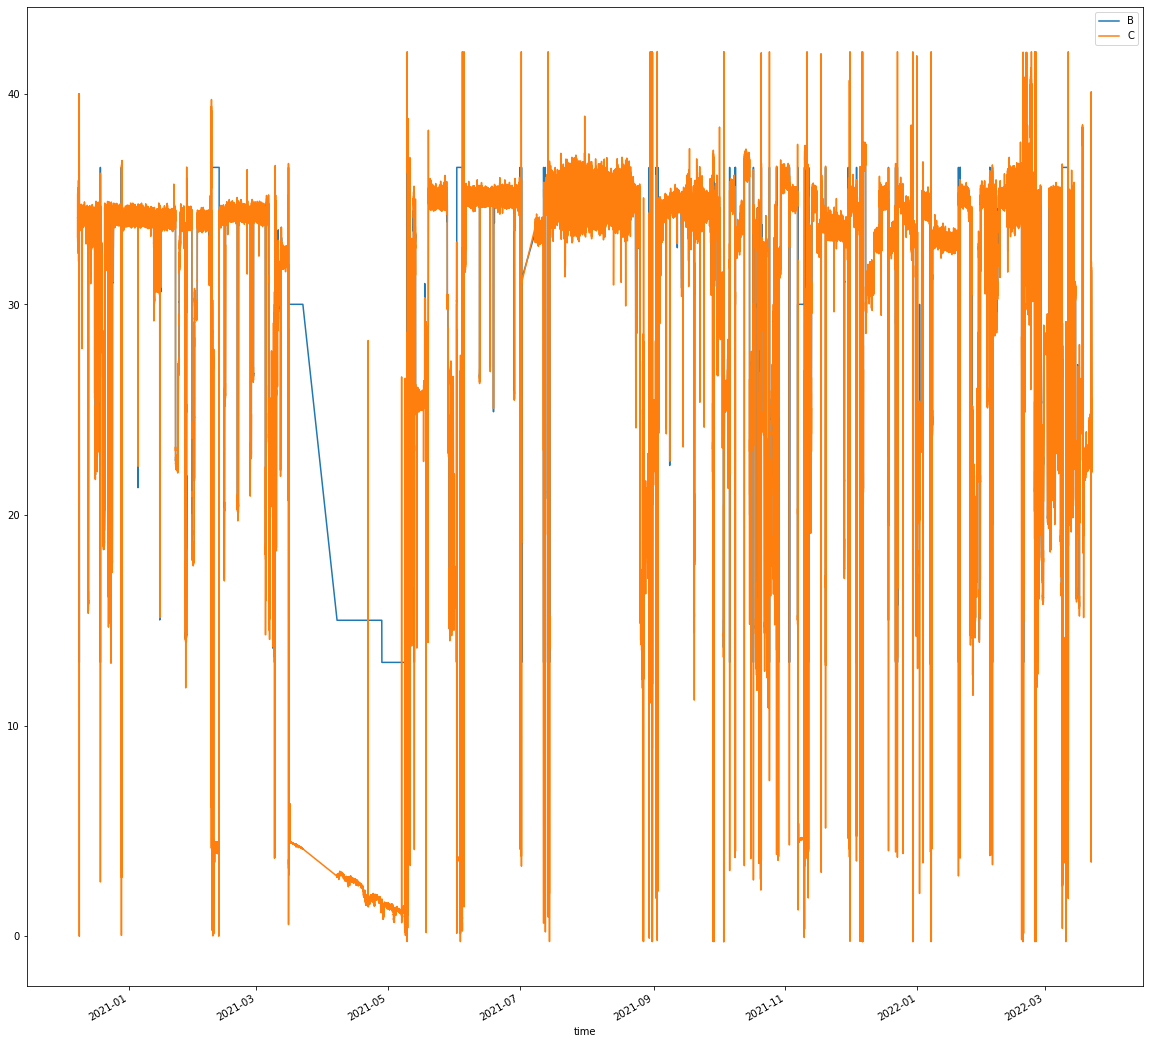

In [ ]:
data.plot(x="time", y=["B", "C"], figsize=(20, 20))

In [ ]:
delta_a = data.A[1:-1] - data.A[0:-2]
delta_b = data.B[1:-1] - data.B[0:-2]
delta_c = data.C[1:-1] - data.C[0:-2]
anomaly = delta_a > 20 & np.abs(delta_b) < 20 & delta_c < 20

TypeError: Cannot perform 'rand_' with a dtyped [float64] array and scalar of type [bool]